# EDA V1

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [ ]:
import tensorflow as tf   # TensorFlow registers PluggableDevices here.
tf.config.list_physical_devices()

In [84]:
df = pd.read_csv(r'../data/simulated_train.csv')

In [85]:
print(df.isna().sum())

DATE_TIME              0
AMBIENT_TEMPERATURE    0
IRRADIATION            0
DC_POWER               0
HOUR                   0
MINUTE                 0
HOUR_SIN               0
HOUR_COS               0
IS_NIGHT               0
DAWN_DUSK              0
DC_PER_IRR             0
IRR_15MIN_AGO          1
TEMP_30MIN_AGO         2
DAY_OF_WEEK            0
IS_WEEKEND             0
dtype: int64


In [86]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],format='mixed')
df['DATE'] = df['DATE_TIME'].dt.date

### Max Power Generation of a Day

In [87]:
df_day_power= df[['DATE','DC_POWER']]
df_day_power = df_day_power.groupby('DATE',as_index=False)['DC_POWER'].max().round(2).sort_values('DATE')  # ensures date order


In [88]:
fig = px.line(data_frame=df_day_power,x='DATE',y='DC_POWER',title='Max Power Generation of a Day',text='DC_POWER',markers=True)
fig.update_layout(xaxis_title ='Date',yaxis_title='DC Power(W)',template='plotly_dark')
fig.show()

### Hourly Avg. Power

In [89]:
df_power = df[['HOUR','DC_POWER']]

df_power=df_power.groupby('HOUR').agg({'DC_POWER':"mean"}).reset_index()


fig = px.line(data_frame=df_power,x='HOUR',y='DC_POWER',title='Hourly avg power')
fig.update_layout(xaxis_title='Hours',yaxis_title="Avg Power(W)",template='plotly_dark')
fig.show()

### Power Generation vs Irradiation

In [90]:
plot_scatter = df[['DC_POWER','IRRADIATION']]

fig = px.scatter(data_frame=plot_scatter,x='IRRADIATION',y='DC_POWER',title=" Power Generation vs Irradiation",trendline='ols')
fig.update_layout(xaxis_title='Irradiation',yaxis_title='DC Power(W)',template='plotly_dark')
fig.show()


In [91]:
import statsmodels.api as sm
X = sm.add_constant(plot_scatter['IRRADIATION'])
model = sm.OLS(plot_scatter['DC_POWER'], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               DC_POWER   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.127e+07
Date:                Sun, 03 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:03:23   Log-Likelihood:                 1151.1
No. Observations:                 480   AIC:                            -2298.
Df Residuals:                     478   BIC:                            -2290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0058      0.001     -4.578      

In [92]:
plot_p_t1 = df[['AMBIENT_TEMPERATURE','DC_POWER']]

fig = px.scatter(data_frame=plot_p_t1,x="DC_POWER",y='AMBIENT_TEMPERATURE',title="Power Generation vs Ambient Temperature")
fig.show()

### MAX Irradiation

In [93]:
df_irr = df[['DATE','IRRADIATION']]
df_irr = df.groupby("DATE",as_index=False).agg({"IRRADIATION":"max"})

In [94]:
plot = px.line(data_frame=df_irr,x='DATE',y="IRRADIATION",hover_name='IRRADIATION',title="Max Irradiation")
plot.update_layout(yaxis_title='Irradiation (W/m2)',xaxis_title='Date',title_font = dict(size=20))
plot.show()


### Power Generation at Night

In [95]:
df_night1 = df[["DC_POWER","IS_NIGHT"]]


fig_night = px.box(
    data_frame=df_night1, 
    x='IS_NIGHT', 
    y='DC_POWER', 
    title='DC Power Distribution during Night vs Day',
    labels={'IS_NIGHT': 'Is Night (1 = Yes, 0 = No)', 'DC_POWER': 'DC Power (|W)'},
    color='IS_NIGHT',
    color_discrete_map={0: 'orange', 1: 'black'}
)
fig_night.update_layout(
    template='plotly_white',
    xaxis_title='Night Status',
    yaxis_title='DC Power (W)',
    showlegend=False
)
fig_night.show()


In [96]:

df_dusk1 = df[["DAWN_DUSK","DC_POWER"]]

df_dusk1=df.groupby('DAWN_DUSK')['DC_POWER'].mean().reset_index()

fig_dawn_dusk = px.bar(
    data_frame=df_dusk1,
    x='DAWN_DUSK',
    y='DC_POWER',
    title='Average DC Power: Dawn/Dusk vs Other Times',
    labels={'DAWN_DUSK': 'Dawn/Dusk Period (1 = Yes, 0 = No)', 'DC_POWER': 'Average DC Power (W)'},
    
)
fig_dawn_dusk.update_layout(
    template='plotly_dark',
    xaxis_title='Dawn/Dusk Status',
    yaxis_title='Avg DC Power (W)',
    showlegend=False
)
fig_dawn_dusk.show()



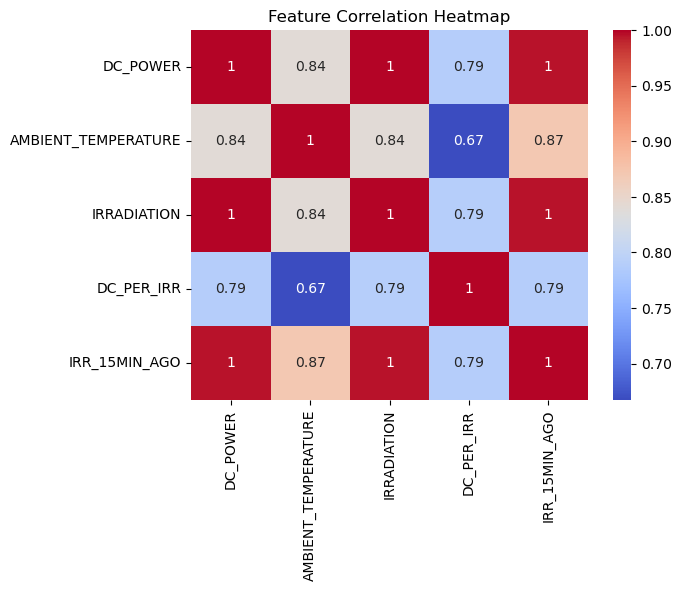

In [97]:


features_to_check = ['DC_POWER', 'AMBIENT_TEMPERATURE', 
                     'IRRADIATION', 'DC_PER_IRR', 'IRR_15MIN_AGO']

corr = df[features_to_check].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

